In [63]:
from google.colab import drive
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import validation_curve
SEED=42

# Data

In [25]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data = pd.read_csv('/content/drive/MyDrive/Data/cleaned_final.csv').reset_index(drop=True)

In [27]:
data2 = data.drop(columns=['Opiods Used'])
names = data2.columns.tolist()

In [28]:
SEED = 42
X_train, X_test, y_train, y_test=train_test_split(data.drop('Opiods Used', axis=1),
    data['Opiods Used'],test_size=0.2, stratify=data['Opiods Used'],
    shuffle=True,
    random_state=SEED)

#undersampling with NearMiss
SEED = 42
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
X_train_miss = pd.DataFrame(data=X_train_miss, columns= names)

In [30]:
X_train_miss.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

In [31]:
X_test.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

# Simple Classification tree

Will first do a simple classification tree

## Decision tree with default parameters 

In [88]:
clf = tree.DecisionTreeClassifier(random_state=SEED)
clf = clf.fit(X_train_miss,y_train_miss)
pred= clf.predict(X_test)

print(confusion_matrix(y_test,pred))
print(matthews_corrcoef(y_test, pred))
print(roc_auc_score(y_test, pred))

[[18769  2615]
 [  182  2567]]
0.6278545271387685
0.9057532076079224


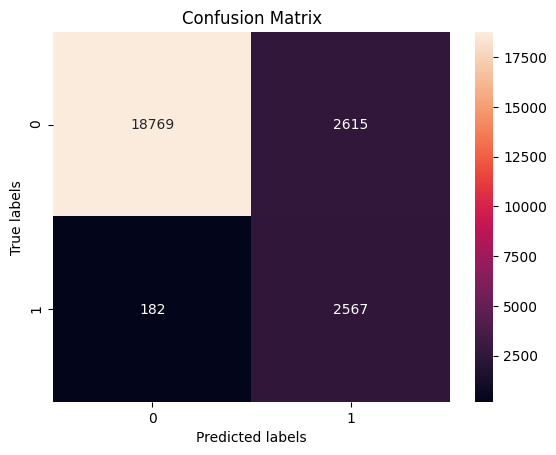

In [89]:
cm=confusion_matrix(y_test,clf.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

[Text(128.63070544460243, 213.0912, 'X[48] <= 7.5\ngini = 0.5\nsamples = 21990\nvalue = [10995, 10995]'),
 Text(56.62598731129254, 204.3936, 'X[54] <= 0.5\ngini = 0.199\nsamples = 10218\nvalue = [9072, 1146]'),
 Text(36.83267265486409, 195.696, 'X[51] <= 4.5\ngini = 0.068\nsamples = 8739\nvalue = [8429, 310]'),
 Text(28.616159953375902, 186.9984, 'X[53] <= 0.5\ngini = 0.031\nsamples = 8282\nvalue = [8151, 131]'),
 Text(26.34144994811024, 178.3008, 'X[49] <= 13.5\ngini = 0.026\nsamples = 8258\nvalue = [8149, 109]'),
 Text(23.54470341040965, 169.60320000000002, 'X[15] <= 2.5\ngini = 0.02\nsamples = 8211\nvalue = [8129, 82]'),
 Text(20.58022054425455, 160.9056, 'X[52] <= 0.5\ngini = 0.017\nsamples = 8187\nvalue = [8117, 70]'),
 Text(17.99228861952793, 152.208, 'X[3] <= 0.5\ngini = 0.016\nsamples = 8178\nvalue = [8114, 64]'),
 Text(14.130929874697737, 143.5104, 'X[25] <= 9.0\ngini = 0.006\nsamples = 7684\nvalue = [7660, 24]'),
 Text(13.692761506490054, 134.81279999999998, 'X[40] <= 19.0\ng

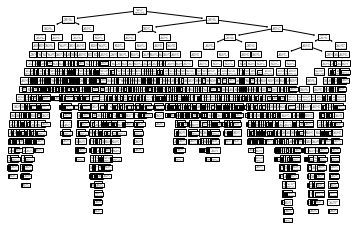

In [ ]:
tree.plot_tree(clf) 

Here, the parameters of the classification tree are the default ones. i.e. With the gini criterion, no max_depth of the tree, a min_samples_split of 1 and a min_samples_leaf of 1 . 

> let's try to do hyperparameters tunning to improve the model and also decrease the try: (look at criterion, max_depth, min_sample_split, min_samples_leaf, max features ) 

## Parameters tuning

In [ ]:
criterion = ['gini', 'entropy']
depth = list(range(1,60,3))
min_split = list(range(2,100,3))
min_leaf = list(range(1,60,3))
max_feat = ['auto', 'sqrt', 'log2']

parameters_t1 = [criterion, depth, min_split, min_leaf, max_feat ]
parameters_t1 = list(itertools.product(*parameters_t1))

In [ ]:
conf_matrix_t1 = []
AUC_scores_t1 = []
MCC_scores_t1 = []
for i in range(len(parameters_t1)):
    tree_classifier= DecisionTreeClassifier(criterion= parameters_t1[i][0] , max_depth= parameters_t1[i][1], min_samples_split = parameters_t1[i][2], min_samples_leaf= parameters_t1[i][3], max_features = parameters_t1[i][4],  random_state=42 )
    tree_classifier.fit(X_train_miss, y_train_miss)
    pred = tree_classifier.predict(X_test)
    conf_matrix_t1.append(confusion_matrix(y_test, pred))
    MCC_scores_t1.append(matthews_corrcoef(y_test, pred))
    AUC_scores_t1.append(roc_auc_score(y_test, pred))
  
    print(i, ' done')

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
74200  done
74201  done
74202  done
74203  done
74204  done
74205  done
74206  done
74207  done
74208  done
74209  done
74210  done
74211  done
74212  done
74213  done
74214  done
74215  done
74216  done
74217  done
74218  done
74219  done
74220  done
74221  done
74222  done
74223  done
74224  done
74225  done
74226  done
74227  done
74228  done
74229  done
74230  done
74231  done
74232  done
74233  done
74234  done
74235  done
74236  done
74237  done
74238  done
74239  done
74240  done
74241  done
74242  done
74243  done
74244  done
74245  done
74246  done
74247  done
74248  done
74249  done
74250  done
74251  done
74252  done
74253  done
74254  done
74255  done
74256  done
74257  done
74258  done
74259  done
74260  done
74261  done
74262  done
74263  done
74264  done
74265  done
74266  done
74267  done
74268  done
74269  done
74270  done
74271  done
74272  done
74273  done
74274  done
74275  done
74276  don

> The combinaison that gives the best auc : 

In [ ]:
print(parameters_t1[AUC_scores_t1.index(max(AUC_scores_t1))])
print(max(AUC_scores_t1))
print(conf_matrix_t1[AUC_scores_t1.index(max(AUC_scores_t1))])  

('entropy', 16, 26, 10, 'auto')
0.9012388972652301
[[18257  3127]
 [  141  2608]]


> The combinaison that gives the best MCC : 

In [ ]:
print(parameters_t1[MCC_scores_t1.index(max(MCC_scores_t1))])
print(max(MCC_scores_t1))
print(conf_matrix_t1[MCC_scores_t1.index(max(MCC_scores_t1))])  

('gini', 22, 71, 16, 'auto')
0.6172414974503466
[[18674  2710]
 [  195  2554]]


**We'll keep the combinaison that gives the best AUC score because it's better to have less FN in our case:**



**('entropy', 16, 26, 10, 'auto')** 



## Final Decision tree

Let's try to plot this tree : 


In [82]:
dt_classifier = tree.DecisionTreeClassifier( criterion= 'entropy' , max_depth= 16, min_samples_split = 26, min_samples_leaf= 10, max_features = 'auto',  random_state= SEED )
dt_classifier = dt_classifier.fit(X_train_miss,y_train_miss)

In [ ]:
print("the MCC is :", matthews_corrcoef(y_test, dt_classifier.predict(X_test)))
print("the AUC is :", roc_auc_score(y_test, dt_classifier.predict(X_test)))
print("the accuracy is :", accuracy_score(y_test, dt_classifier.predict(X_test)))

the MCC is : 0.5989807264850951
the AUC is : 0.9012388972652301
the accuracy is : 0.8645837649691294


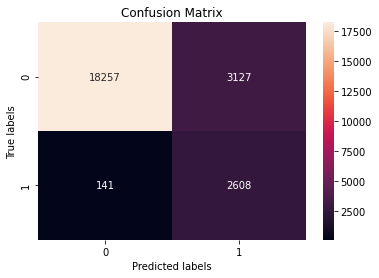

In [ ]:
cm=confusion_matrix(y_test,dt_classifier.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

[Text(164.605198407488, 211.04470588235293, 'X[48] <= 7.5\nentropy = 1.0\nsamples = 21990\nvalue = [10995, 10995]'),
 Text(53.85738295318127, 198.25411764705882, 'X[48] <= 3.5\nentropy = 0.506\nsamples = 10218\nvalue = [9072, 1146]'),
 Text(27.129651860744296, 185.4635294117647, 'X[2] <= 1.5\nentropy = 0.157\nsamples = 5727\nvalue = [5596, 131]'),
 Text(18.890276110444177, 172.6729411764706, 'X[50] <= 2.5\nentropy = 0.112\nsamples = 5307\nvalue = [5228, 79]'),
 Text(11.454741896758703, 159.88235294117646, 'X[49] <= 14.5\nentropy = 0.036\nsamples = 4673\nvalue = [4655, 18]'),
 Text(10.650900360144057, 147.09176470588235, 'X[20] <= 0.5\nentropy = 0.026\nsamples = 4663\nvalue = [4651, 12]'),
 Text(6.83265306122449, 134.30117647058825, 'X[10] <= 0.5\nentropy = 0.017\nsamples = 3805\nvalue = [3799, 6]'),
 Text(6.028811524609844, 121.51058823529411, 'X[14] <= 0.5\nentropy = 0.015\nsamples = 3790\nvalue = [3785, 5]'),
 Text(5.224969987995198, 108.72, 'X[139] <= 180404.5\nentropy = 0.009\nsamp

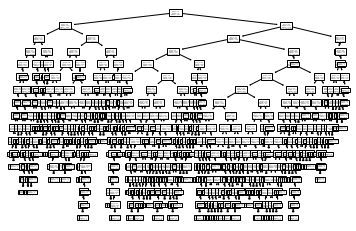

In [ ]:
tree.plot_tree(dt_classifier) 

## best variables

In [84]:
#Get the importance of each variable 
importances_t = list(dt_classifier.feature_importances_)
features_name = X_train_miss.columns.tolist()

#put the importance and the name in a list using zip
feature_importances_t = [(feature, round(importance, 4)) for feature, importance in zip(features_name, importances_t)]

#sort the values 
feature_importances_t = sorted(feature_importances_t, key = lambda x: x[1], reverse = True)

#keep the 10most importany
feature_importances_t_10 = feature_importances_t[0:10]

#print the top 10 features

[print('Variable: {:20} Importance:      {}'.format(*pair)) for pair in feature_importances_t_10];

Variable: CPT Category - Medicine Importance:      0.5747
Variable: NDC Class - Muscle Relaxants Importance:      0.1075
Variable: CPT Category - Surgery Importance:      0.0691
Variable: ICD Group 13         Importance:      0.0388
Variable: CPT Category - Radiology Importance:      0.0278
Variable: CPT Category - Eval_Mgmt Importance:      0.021
Variable: Benefits State_CA    Importance:      0.0159
Variable: ICD Group 19         Importance:      0.0156
Variable: Weekly Wage          Importance:      0.0155
Variable: CPT Category - Path_Lab Importance:      0.0148


Text(0.5, 1.0, '10 most important features with single Classification tree ')

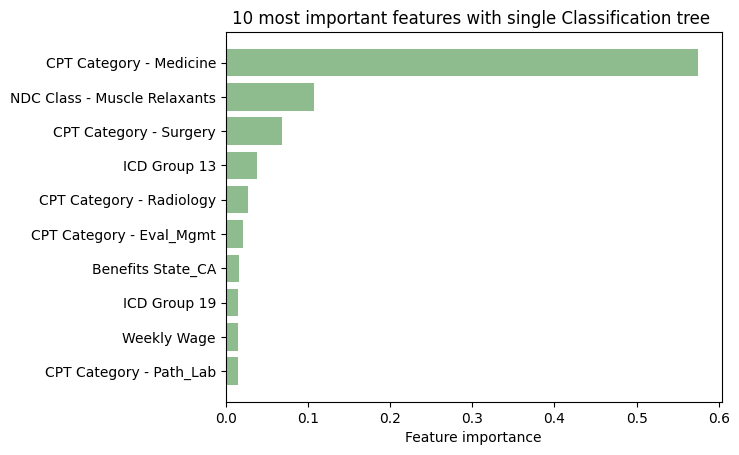

In [91]:
feature, importance_t = zip(*feature_importances_t_10)
y_pos = np.arange(len(feature)) 

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, importance_t, align='center', color = 'darkseagreen')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature importance')
ax.set_title('10 most important features with single Classification tree ')

# Random forest 

## With default parameters

In [ ]:
rf_d_classifier= RandomForestClassifier(random_state=42 )
rf_d_classifier.fit(X_train_miss, y_train_miss)
pred_d = rf_d_classifier.predict(X_test)  

In [ ]:
print("the MCC is :", matthews_corrcoef(y_test, rf_d_classifier.predict(X_test)))
print("the AUC is :", roc_auc_score(y_test, rf_d_classifier.predict(X_test)))
print("the accuracy is :", accuracy_score(y_test, rf_d_classifier.predict(X_test)))

the MCC is : 0.6402225578418564
the AUC is : 0.9244620990634693
the accuracy is : 0.8793353499357726


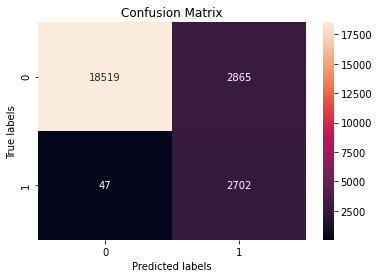

In [ ]:
cm=confusion_matrix(y_test,rf_d_classifier.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

Here we'll use a new method to test the parameters than the one before. We'll use validation curve for each parameter so see the parameter that gives the best auc

## Number of trees in our Random forest : n_estimators

In [ ]:
auc0 = []

#test for 8 values of n_estimators
for i in list(range(100,900, 100)):
    rf0_classifier= RandomForestClassifier(n_estimators= i,  random_state=42 )
    rf0_classifier.fit(X_train_miss, y_train_miss)
    pred_i = rf0_classifier.predict(X_test)  
    auc0.append(roc_auc_score(y_test, pred_i))

Text(0, 0.5, 'AUC score')

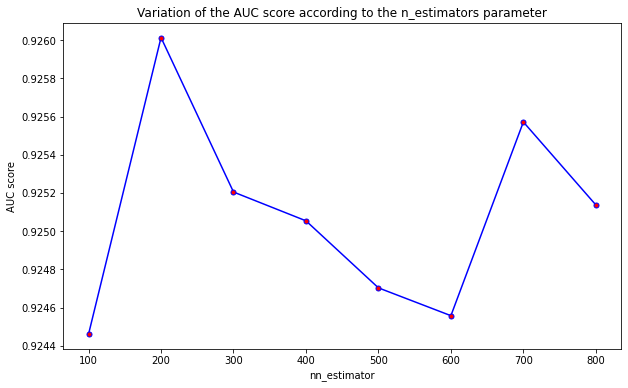

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(100,900, 100),auc0,color='blue', linestyle='-', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Variation of the AUC score according to the n_estimators parameter')
plt.xlabel('nn_estimator')
plt.ylabel('AUC score')

In [ ]:
estimators= list(range(100,900, 100))
print(max(auc0))
print('the best depth is :', estimators[auc0.index(max(auc0))])  

0.9260131766447194
the best depth is : 200


## Measure of purity in our Random forest : criterion

In [ ]:
auc1 = []
criter  = ['gini', 'entropy']
#test for the 2 criterion
for i in criter :
    rf1_classifier= RandomForestClassifier(n_estimators= 200, criterion= i ,random_state=42 )
    rf1_classifier.fit(X_train_miss, y_train_miss)
    pred_i = rf1_classifier.predict(X_test)  
    auc1.append(roc_auc_score(y_test, pred_i))

([<matplotlib.axis.XTick at 0x7ff68e972358>,
 [Text(0, 0, 'gini'), Text(0, 0, 'entropy')])

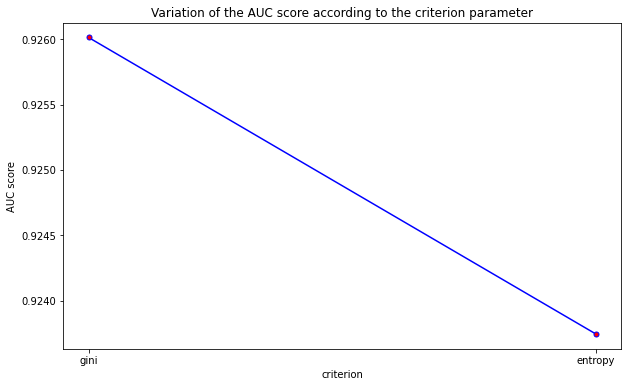

In [ ]:
plt.figure(figsize=(10,6))
plt.plot([0,1],auc1,color='blue', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Variation of the AUC score according to the criterion parameter')
plt.xlabel('criterion')
plt.ylabel('AUC score')
plt.xticks([0,1], criter)

## Maximum depth of the tree in our random forest  : max_depth

In [ ]:
auc2 = []

#test for 30 values of max_depth
for i in list(range(1,60,2)):
    rf2_classifier= RandomForestClassifier(n_estimators= 200, criterion= 'gini', max_depth=i ,random_state=42 )
    rf2_classifier.fit(X_train_miss, y_train_miss)
    pred_i = rf2_classifier.predict(X_test)  
    auc2.append(roc_auc_score(y_test, pred_i))

Text(0, 0.5, 'AUC score')

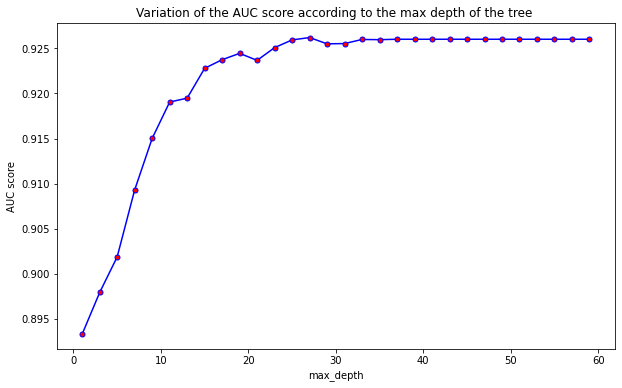

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60,2),auc2,color='blue', linestyle='-', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Variation of the AUC score according to the max depth of the tree ')
plt.xlabel('max_depth')
plt.ylabel('AUC score')

In [ ]:
depth = list(range(1,60,2))
print(max(auc2))
print('the best depth is :', depth[auc2.index(max(auc2))])  

0.9262002323873306
the best depth is : 27


## Minimum number of samples required to split an internal nodein our Random Forest : min_samples_split

In [ ]:
auc3 = []

#test for 50 values of min_samples_split
for i in list(range(2,100,2)):
    rf3_classifier= RandomForestClassifier(n_estimators= 200, criterion= 'gini', max_depth= 27 , min_samples_split=i ,random_state=42 )
    rf3_classifier.fit(X_train_miss, y_train_miss)
    pred_i = rf3_classifier.predict(X_test)  
    auc3.append(roc_auc_score(y_test, pred_i))

Text(0, 0.5, 'AUC score')

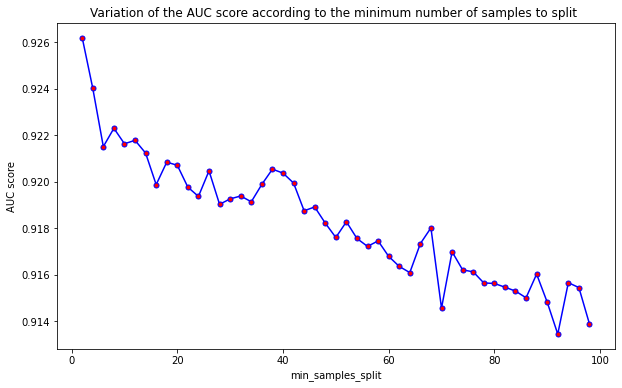

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,100,2),auc3,color='blue', linestyle='-', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Variation of the AUC score according to the minimum number of samples to split ')
plt.xlabel('min_samples_split')
plt.ylabel('AUC score')

In [ ]:
split = list(range(2,100,2))
print(max(auc3))
print('the best min_samples_split is :', split[auc3.index(max(auc3))])  

0.9262002323873306
the best min_samples_split is : 2


## The minimum number of samples required to be at a leaf node in our random forest : min_samples_leaf

In [ ]:
auc4 = []

#test for 30 values of min_samples_leaf
for i in list(range(1,60,2)):
    rf4_classifier= RandomForestClassifier(n_estimators= 200, criterion= 'gini', max_depth= 27 , min_samples_split= 2 ,min_samples_leaf=i, random_state=42 )
    rf4_classifier.fit(X_train_miss, y_train_miss)
    pred_i = rf4_classifier.predict(X_test)  
    auc4.append(roc_auc_score(y_test, pred_i))

Text(0, 0.5, 'AUC score')

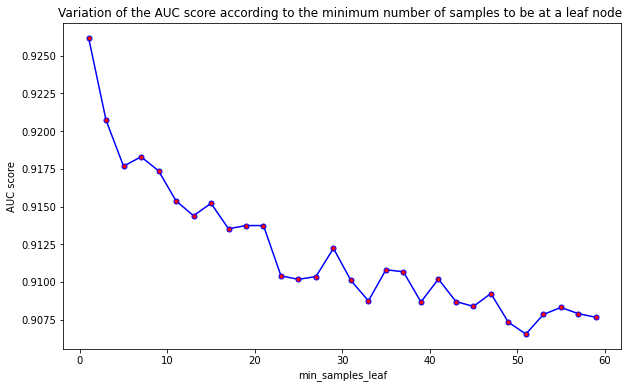

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60,2),auc4,color='blue', linestyle='-', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Variation of the AUC score according to the minimum number of samples to be at a leaf node ')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC score')

In [ ]:
leaf = list(range(1,60,2))
print(max(auc4))
print('the best depth is :', leaf[auc4.index(max(auc4))])  

0.9262002323873306
the best depth is : 1


## The number of features to consider when looking for the best split in our random tree:  max_features

In [ ]:
auc5 = []
features = ['auto', 'sqrt', 'log2']

#test for 3 values of max_features
for i in features:
    rf5_classifier= RandomForestClassifier(n_estimators= 200, criterion= 'gini', max_depth= 27 , min_samples_split= 2 ,min_samples_leaf= 1 ,max_features = i , random_state=42 )
    rf5_classifier.fit(X_train_miss, y_train_miss)
    pred_i = rf5_classifier.predict(X_test)  
    auc5.append(roc_auc_score(y_test, pred_i))

([<matplotlib.axis.XTick at 0x7ff6869937b8>,
 [Text(0, 0, 'auto'), Text(0, 0, 'sqrt'), Text(0, 0, 'log2')])

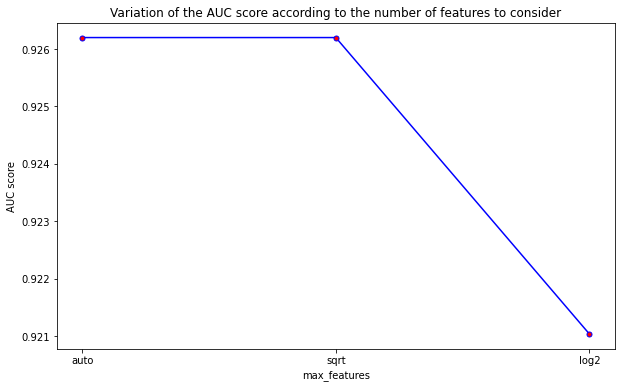

In [ ]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2],auc5,color='blue', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Variation of the AUC score according to the number of features to consider')
plt.xlabel('max_features')
plt.ylabel('AUC score')
plt.xticks([0,1,2], features)

In [ ]:
print(max(auc5))
print('the best max_features is :', features[auc5.index(max(auc5))])  

0.9262002323873306
the best max_features is : auto


## testing all the combinaisons of parameters to see the possible difference of the best hyperparameters 

In [ ]:
n_estimators = list(range(100,500,100))
criterion = ['gini', 'entropy']
depth = list(range(1,35,4))
min_split = list(range(2,20,4))
min_leaf = list(range(1,20,4))

parameters_rf6 = [criterion, depth, min_split, min_leaf,n_estimators]
parameters_rf6 = list(itertools.product(*parameters_rf6))
len(parameters_rf6)

1800

In [ ]:
conf_matrix_rf6 = []
AUC_scores_rf6 = []
MCC_scores_rf6 = []

for i in range(len(parameters_rf6)):
    rf6_classifier= RandomForestClassifier(n_estimators= parameters_rf6[i][4], criterion= parameters_rf6[i][0] , max_depth= parameters_rf6[i][1], min_samples_split = parameters_rf6[i][2], min_samples_leaf= parameters_rf6[i][3],  random_state=42 )
    rf6_classifier.fit(X_train_miss, y_train_miss)
    pred = rf6_classifier.predict(X_test)
    conf_matrix_rf6.append(confusion_matrix(y_test, pred))
    MCC_scores_rf6.append(matthews_corrcoef(y_test, pred))
    AUC_scores_rf6.append(roc_auc_score(y_test, pred))
      
    print(i, 'done')

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123

In [ ]:
print(parameters_rf6[AUC_scores_rf6.index(max(AUC_scores_rf6))])
print(max(AUC_scores_rf6))
print(conf_matrix_rf6[AUC_scores_rf6.index(max(AUC_scores_rf6))])  

('gini', 33, 2, 1, 200)
0.9259897946768929
[[18561  2823]
 [   44  2705]]


It gives almost the same combinaison, only the depth is a bit higher


## Final Random forest with first technique

In [36]:
rf_1_classifier= RandomForestClassifier(n_estimators= 200, criterion= 'gini', max_depth= 27 , min_samples_split= 2 ,min_samples_leaf= 1 ,max_features = 'sqrt' ,random_state=42 )
rf_1_classifier.fit(X_train_miss, y_train_miss)
pred_1 = rf_1_classifier.predict(X_test)  

In [37]:
print("the MCC is :", matthews_corrcoef(y_test, rf_1_classifier.predict(X_test)))
print("the AUC is :", roc_auc_score(y_test, rf_1_classifier.predict(X_test)))
print("the accuracy is :", accuracy_score(y_test, rf_1_classifier.predict(X_test)))

the MCC is : 0.644800653302338
the AUC is : 0.9262002323873306
the accuracy is : 0.8815729499026229


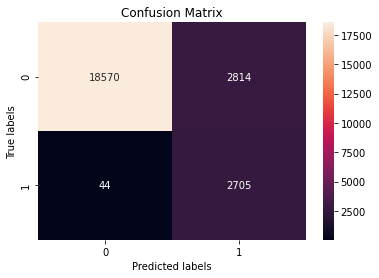

In [38]:
cm=confusion_matrix(y_test,rf_1_classifier.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

metrics on the training set :

In [ ]:
print("the MCC is :", matthews_corrcoef(y_train_miss, rf_1_classifier.predict(X_train_miss)))
print("the AUC is :", roc_auc_score(y_train_miss, rf_1_classifier.predict(X_train_miss)))
print("the accuracy is :", accuracy_score(y_train_miss, rf_1_classifier.predict(X_train_miss)))

the MCC is : 1.0
the AUC is : 1.0
the accuracy is : 1.0


That's a lot...

## Final random forest with second tuning technique

In [32]:
rf_2_classifier= RandomForestClassifier(n_estimators= 200, criterion= 'gini', max_depth= 33 , min_samples_split= 2 ,min_samples_leaf= 1 ,max_features = 'auto' ,random_state=42 )
rf_2_classifier.fit(X_train_miss, y_train_miss)
pred_2 = rf_2_classifier.predict(X_test)  

In [33]:
print("the MCC is :", matthews_corrcoef(y_test, rf_2_classifier.predict(X_test)))
print("the AUC is :", roc_auc_score(y_test, rf_2_classifier.predict(X_test)))
print("the accuracy is :", accuracy_score(y_test, rf_2_classifier.predict(X_test)))

the MCC is : 0.6441131698604703
the AUC is : 0.9259897946768929
the accuracy is : 0.8812000165748146


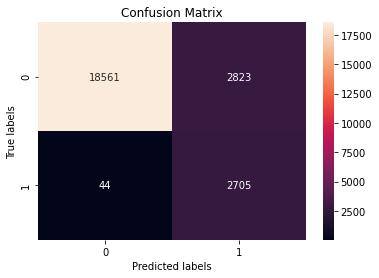

In [39]:
cm=confusion_matrix(y_test,rf_2_classifier.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

The results are really really close, the only difference is that we have 9 more True negative

In [ ]:
print("the MCC is :", matthews_corrcoef(y_train_miss, rf_2_classifier.predict(X_train_miss)))
print("the AUC is :", roc_auc_score(y_train_miss, rf_2_classifier.predict(X_train_miss)))
print("the accuracy is :", accuracy_score(y_train_miss, rf_2_classifier.predict(X_train_miss)))

the MCC is : 1.0
the AUC is : 1.0
the accuracy is : 1.0


# Find best variables 

In [57]:
#Get the importance of each variable 
importances = list(rf_1_classifier.feature_importances_)
features_name = X_train_miss.columns.tolist()

#put the importance and the name in a list using zip
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features_name, importances)]

#sort the values 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#keep the 10most importany
feature_importances_10 = feature_importances[0:10]

#print the top 10 features

[print('Variable: {:20} Importance:      {}'.format(*pair)) for pair in feature_importances_10];

Variable: CPT Category - Medicine Importance:      0.1275
Variable: CPT Category - Radiology Importance:      0.0908
Variable: NDC Class - Muscle Relaxants Importance:      0.0899
Variable: ICD Group 13         Importance:      0.0863
Variable: CPT Category - Eval_Mgmt Importance:      0.082
Variable: CPT Category - Surgery Importance:      0.0661
Variable: CPT Category - Path_Lab Importance:      0.0521
Variable: HCPCS J Codes        Importance:      0.0356
Variable: CPT Category - Anesthesia Importance:      0.0323
Variable: HCPCS E Codes        Importance:      0.0313


Text(0.5, 1.0, '10 most important features with Random Forest ')

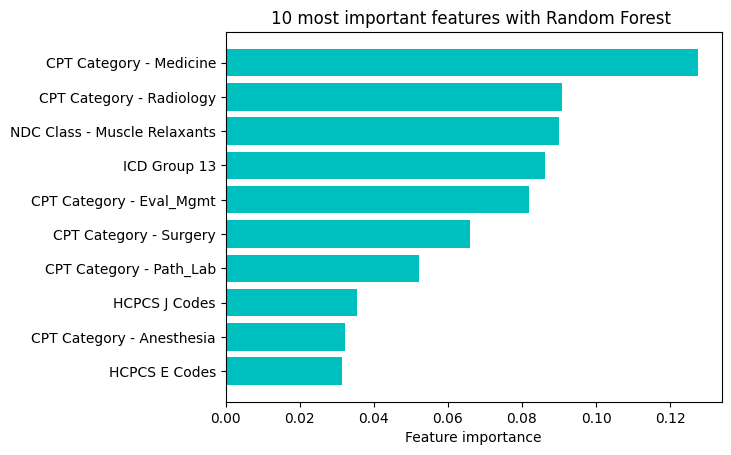

In [90]:
feature, importance = zip(*feature_importances_10)
y_pos = np.arange(len(feature)) 

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, importance, align='center', color = 'C')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature importance')
ax.set_title('10 most important features with Random Forest ')